In [10]:
import numpy as np 
import matplotlib.pyplot as  plt 

In [13]:
def Ck(x,y, k, step_round=3):

    """
    Calculate the Ck coefficients for the Complex fourier transform of a signal.
    """
    step = np.round((max(x)-min(x))/len(x),step_round)
    Ck = np.dot(y, np.exp(1j*k*x))*step
    return Ck/(2*np.pi)   


def CFT(x,y,N):
    CFT = 0
    for k in range(-N,N):
        CFT +=Ck(x, y, k)*np.exp(1j*k*x)
    return CFT

# Signal generation function
def triangular_signal(Min, Max, Step, A=1):

    """
    Generate a triangular signal.
    
    Parameters:
    x (numpy.ndarray): Input array of time values.
    
    Returns:
    numpy.ndarray: Triangular signal values corresponding to the input time values.
    """
    x = np.arange(Min, Max, Step)
    y = np.zeros_like(x)
    y[len(y)//8:7*len(y)//8] = A*(-1*abs(x[len(y)//8:7*len(y)//8]) + max(abs(x[len(y)//8:7*len(y)//8])))
    return x, y

# Discrete Fourier Transform

def plot_signal_and_cft(x,y, list_N =[2,5,20,50]):
    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, label='Original Signal')
    for n in list_N:
        ax.plot(x, CFT(x, y, n), label=f'CFT with N={n}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title('Discrete Complex Fourier Transform of a Triangular Signal')
    ax.legend(loc='upper right')
    plt.grid()
    plt.show()


/home/fabrice/anaconda3/envs/my_env/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/fabrice/anaconda3/envs/my_env/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


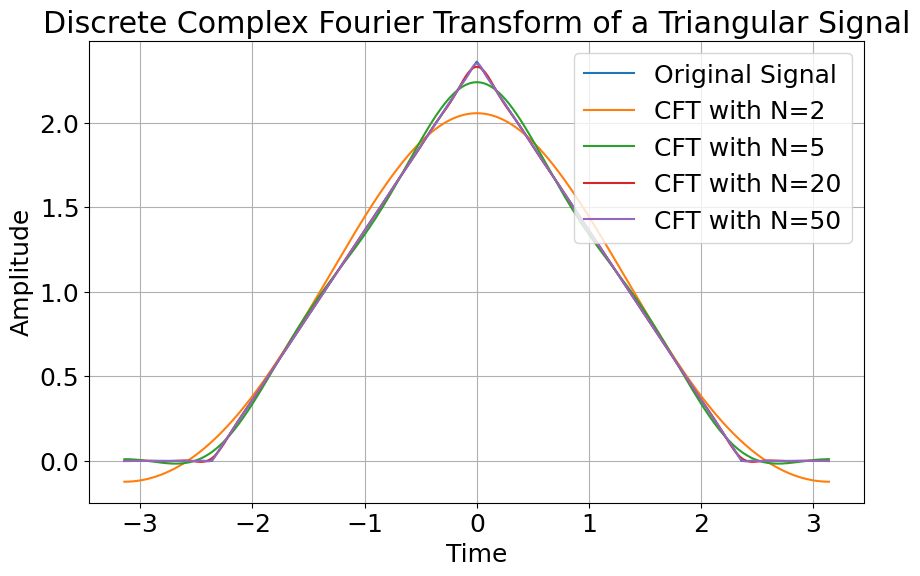

In [14]:
x,y = triangular_signal(-np.pi, np.pi, 0.01, A=1)
plot_signal_and_cft(x,y)
